In [1]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Import the data

In [2]:
data=pd.read_csv('/Users/alok.g.v/Desktop/analytical vidya/train_E1GspfA.csv')
data

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
...,...,...,...
18242,2021-02-28,19,95
18243,2021-02-28,20,88
18244,2021-02-28,21,39
18245,2021-02-28,22,104


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    18247 non-null  object
 1   hour    18247 non-null  int64 
 2   demand  18247 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 427.8+ KB


# Convert date in object type to datetime

In [4]:
data['date']=pd.to_datetime(data['date'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18247 non-null  datetime64[ns]
 1   hour    18247 non-null  int64         
 2   demand  18247 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 427.8 KB


In [6]:
data['date'].value_counts()

2018-10-14    24
2020-04-12    24
2021-01-09    24
2020-04-05    24
2021-02-28    24
              ..
2018-09-05    11
2018-09-03    10
2019-08-29     9
2018-09-25     9
2018-09-30     7
Name: date, Length: 895, dtype: int64

# Histogram plot of view the distribution of data over the year

<AxesSubplot:xlabel='date', ylabel='Count'>

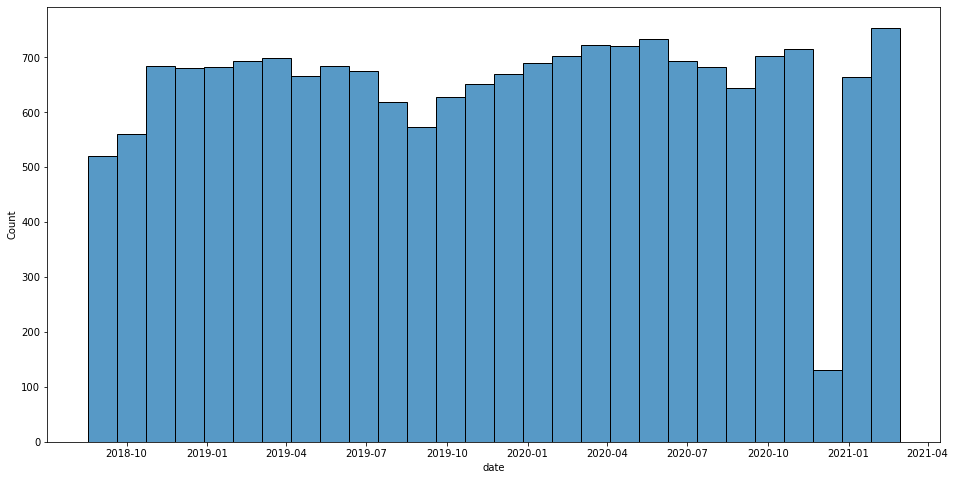

In [7]:
plt.figure(figsize=(16,8))
sns.histplot(data=data,x='date')

# Histogram plot to view the distribution over hours

<AxesSubplot:xlabel='hour', ylabel='Count'>

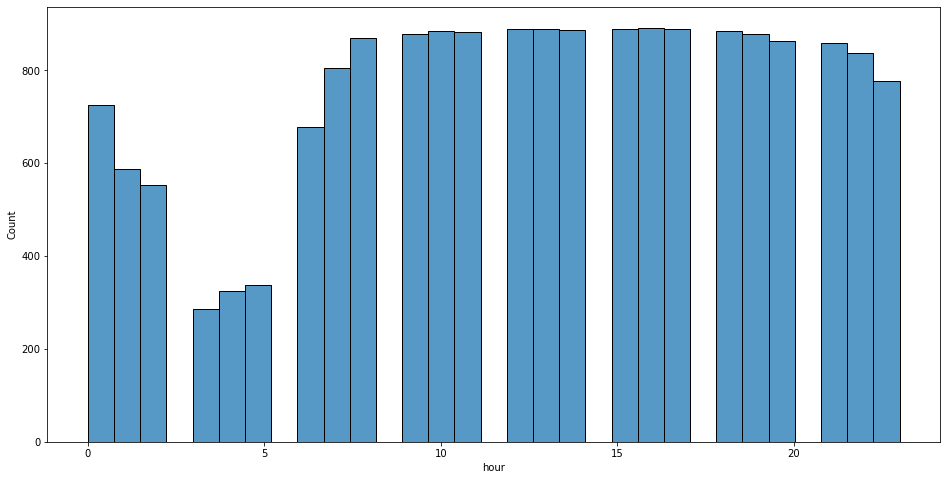

In [8]:
plt.figure(figsize=(16,8))
sns.histplot(data=data,x='hour')

# LINE PLOT TO SHOWCASE DEMAND OVER THE HOURS 

<AxesSubplot:xlabel='hour', ylabel='demand'>

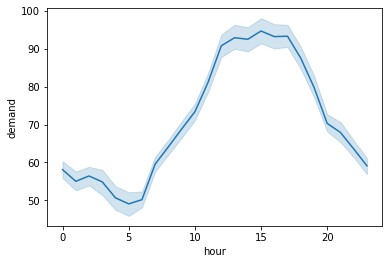

In [9]:
sns.lineplot(data=data,x='hour',y='demand')

# ADDING A COLUMN TO INCLUDE MONTH 

In [10]:
data['date_month_name']=data['date'].dt.month_name()
data.head()

,date,hour,demand,date_month_name
0,2018-08-18,9,91,August
1,2018-08-18,10,21,August
2,2018-08-18,13,23,August
3,2018-08-18,14,104,August
4,2018-08-18,15,81,August


# ADDING COLUMN TO INCLUDE DAY OF THE WEEK 

In [11]:
data['date_day_name']=data['date'].dt.day_name()
data.head()

,date,hour,demand,date_month_name,date_day_name
0,2018-08-18,9,91,August,Saturday
1,2018-08-18,10,21,August,Saturday
2,2018-08-18,13,23,August,Saturday
3,2018-08-18,14,104,August,Saturday
4,2018-08-18,15,81,August,Saturday


# ADDING A COLUMN WHICH SPECIFIES WHETHER THE DATE IS A WEEKEND

In [12]:
data['is_weekend']=np.where(data['date_day_name'].isin(['Sunday','Saturday']),1,0)
data.head()

,date,hour,demand,date_month_name,date_day_name,is_weekend
0,2018-08-18,9,91,August,Saturday,1
1,2018-08-18,10,21,August,Saturday,1
2,2018-08-18,13,23,August,Saturday,1
3,2018-08-18,14,104,August,Saturday,1
4,2018-08-18,15,81,August,Saturday,1


# A column to specify if the data is recorded during woriking hours 

In [13]:
data['working_hour']=np.where(data['hour'].isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]),1,0)
data.head()

,date,hour,demand,date_month_name,date_day_name,is_weekend,working_hour
0,2018-08-18,9,91,August,Saturday,1,1
1,2018-08-18,10,21,August,Saturday,1,1
2,2018-08-18,13,23,August,Saturday,1,1
3,2018-08-18,14,104,August,Saturday,1,1
4,2018-08-18,15,81,August,Saturday,1,1


# ADDING A COLUMN WHICH SPECIFIES WHETHER THE DATE IS ON A HOLIDAY

In [14]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


In [15]:
cal=calendar()
holiday=cal.holidays(start=data['date'].min(),end=data['date'].max())
data['holiday']=np.where(data['date'].isin(holiday),1,0)


In [16]:
data[data['holiday']==1]

,date,hour,demand,date_month_name,date_day_name,is_weekend,working_hour,holiday
243,2018-09-03,7,73,September,Monday,0,1,1
244,2018-09-03,8,60,September,Monday,0,1,1
245,2018-09-03,9,85,September,Monday,0,1,1
246,2018-09-03,10,40,September,Monday,0,1,1
247,2018-09-03,12,98,September,Monday,0,1,1
...,...,...,...,...,...,...,...,...
17950,2021-02-15,19,79,February,Monday,0,1,1
17951,2021-02-15,20,93,February,Monday,0,1,1
17952,2021-02-15,21,43,February,Monday,0,0,1
17953,2021-02-15,22,43,February,Monday,0,0,1


# ADDING YEAR AND DAY COLUMN IN DATA SET

In [17]:
data['year']=data['date'].dt.year
data['day']=data['date'].dt.dayofweek
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18247 entries, 0 to 18246
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             18247 non-null  datetime64[ns]
 1   hour             18247 non-null  int64         
 2   demand           18247 non-null  int64         
 3   date_month_name  18247 non-null  object        
 4   date_day_name    18247 non-null  object        
 5   is_weekend       18247 non-null  int64         
 6   working_hour     18247 non-null  int64         
 7   holiday          18247 non-null  int64         
 8   year             18247 non-null  int64         
 9   day              18247 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 1.4+ MB


In [18]:
data_18=data[data['year']==2018]
data_19=data[data['year']==2019]
data_20=data[data['year']==2020]
data_21=data[data['year']==2021]

monthly_demand_18=data_18.groupby('date_month_name')['demand'].sum().reset_index().sort_values('demand')
monthly_demand_19=data_19.groupby('date_month_name')['demand'].sum().reset_index().sort_values('demand')
monthly_demand_20=data_20.groupby('date_month_name')['demand'].sum().reset_index().sort_values('demand')
monthly_demand_21=data_21.groupby('date_month_name')['demand'].sum().reset_index().sort_values('demand')
data_t=data.groupby('date_month_name')['demand'].sum().reset_index().sort_values('demand')

# PLOT TO SHOW THE RELATIONSHIP BETWEEN MONTH AND DEMAND

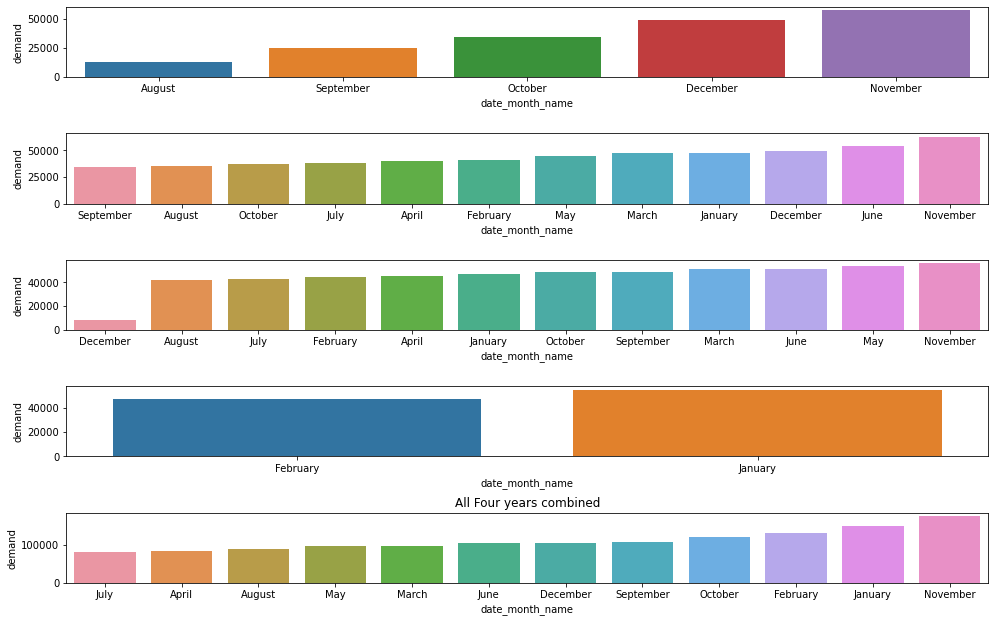

In [19]:
fig,axes=plt.subplots(5,1,figsize=(16,10))
sns.barplot(ax=axes[0],data=monthly_demand_18,x='date_month_name',y='demand')
sns.barplot(ax=axes[1],data=monthly_demand_19,x='date_month_name',y='demand')
sns.barplot(ax=axes[2],data=monthly_demand_20,x='date_month_name',y='demand')
sns.barplot(ax=axes[3],data=monthly_demand_21,x='date_month_name',y='demand')
sns.barplot(ax=axes[4],data=data_t,x='date_month_name',y='demand')

axes[4].set_title('All Four years combined')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.8)

## WE CAN SEE FROM THE PLOT THAT NOVEMBER HAS THE HIGHEST DEMAND AND JULY THE LEAST

# PLOT TO SHOW THE RELATIONSHIP BETWEEN DAY AND DEMAND

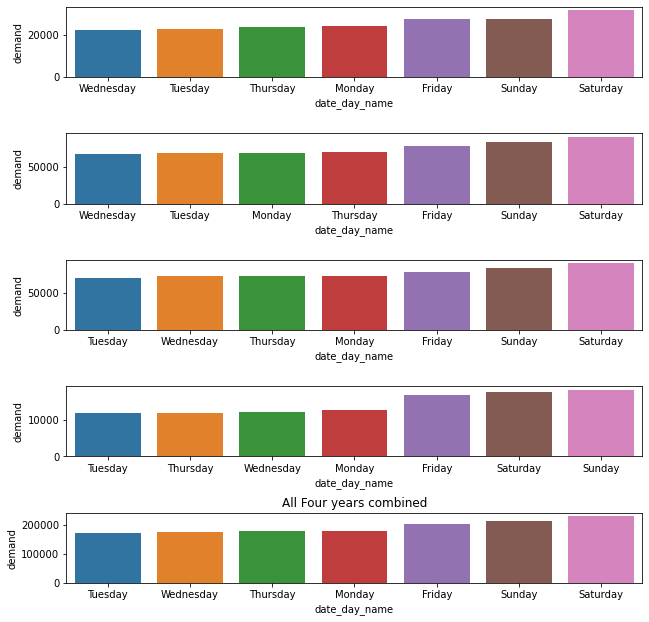

In [20]:
monthly_demand_18=data_18.groupby('date_day_name')['demand'].sum().reset_index().sort_values('demand')
monthly_demand_19=data_19.groupby('date_day_name')['demand'].sum().reset_index().sort_values('demand')
monthly_demand_20=data_20.groupby('date_day_name')['demand'].sum().reset_index().sort_values('demand')
monthly_demand_21=data_21.groupby('date_day_name')['demand'].sum().reset_index().sort_values('demand')
data_t=data.groupby('date_day_name')['demand'].sum().reset_index().sort_values('demand')

fig,axes=plt.subplots(5,1,figsize=(10,10))
sns.barplot(ax=axes[0],data=monthly_demand_18,x='date_day_name',y='demand')
sns.barplot(ax=axes[1],data=monthly_demand_19,x='date_day_name',y='demand')
sns.barplot(ax=axes[2],data=monthly_demand_20,x='date_day_name',y='demand')
sns.barplot(ax=axes[3],data=monthly_demand_21,x='date_day_name',y='demand')
sns.barplot(ax=axes[4],data=data_t,x='date_day_name',y='demand')
axes[4].set_title('All Four years combined')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.8, 
                    hspace=0.8)

## WE CAN SEE FROM THE PLOT THAT SATURDAY HAS THE HIGHEST DEMAND AND TUESDAY THE LEAST

# PLOT TO SHOW THE RELATIONSHIP BETWEEN YEAR AND DEMAND

<AxesSubplot:xlabel='year', ylabel='demand'>

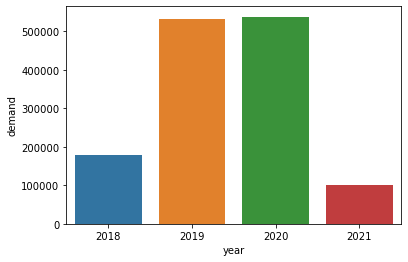

In [21]:
data_t=data.groupby('year')['demand'].sum().reset_index().sort_values('demand')


sns.barplot(data=data_t,x='year',y='demand')



# LABEL ENCODING MONTH AND DAY ACCORDING TO THE PLOTS

In [22]:
le=LabelEncoder()
le=le.fit(data['date_month_name'])
print(le.classes_)
le.classes_ = np.array(['July','April','August','May','March','June','December','September','October',
                        'February','January','November'])
print(le.classes_)
data['date_month_name']=le.transform(data['date_month_name'])
data['date_month_name']

['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
['July' 'April' 'August' 'May' 'March' 'June' 'December' 'September'
 'October' 'February' 'January' 'November']


0        2
1        2
2        2
3        2
4        2
        ..
18242    9
18243    9
18244    9
18245    9
18246    9
Name: date_month_name, Length: 18247, dtype: int64

In [23]:
le=LabelEncoder()
le=le.fit(data['date_day_name'])
print(le.classes_)
le.classes_ = np.array(['Tuesday','Wednesday','Thursday','Monday','Friday','Sunday','Saturday'])
print(le.classes_)
data['date_day_name']=le.transform(data['date_day_name'])
data['date_day_name']

['Friday' 'Monday' 'Saturday' 'Sunday' 'Thursday' 'Tuesday' 'Wednesday']
['Tuesday' 'Wednesday' 'Thursday' 'Monday' 'Friday' 'Sunday' 'Saturday']


0        6
1        6
2        6
3        6
4        6
        ..
18242    5
18243    5
18244    5
18245    5
18246    5
Name: date_day_name, Length: 18247, dtype: int64

In [24]:
data

,date,hour,demand,date_month_name,date_day_name,is_weekend,working_hour,holiday,year,day
0,2018-08-18,9,91,2,6,1,1,0,2018,5
1,2018-08-18,10,21,2,6,1,1,0,2018,5
2,2018-08-18,13,23,2,6,1,1,0,2018,5
3,2018-08-18,14,104,2,6,1,1,0,2018,5
4,2018-08-18,15,81,2,6,1,1,0,2018,5
...,...,...,...,...,...,...,...,...,...,...
18242,2021-02-28,19,95,9,5,1,1,0,2021,6
18243,2021-02-28,20,88,9,5,1,1,0,2021,6
18244,2021-02-28,21,39,9,5,1,0,0,2021,6
18245,2021-02-28,22,104,9,5,1,0,0,2021,6


In [25]:
X=data[['hour','is_weekend','working_hour','holiday','year','day','date_month_name','date_day_name']]
y=data['demand']
X

,hour,is_weekend,working_hour,holiday,year,day,date_month_name,date_day_name
0,9,1,1,0,2018,5,2,6
1,10,1,1,0,2018,5,2,6
2,13,1,1,0,2018,5,2,6
3,14,1,1,0,2018,5,2,6
4,15,1,1,0,2018,5,2,6
...,...,...,...,...,...,...,...,...
18242,19,1,1,0,2021,6,9,5
18243,20,1,1,0,2021,6,9,5
18244,21,1,0,0,2021,6,9,5
18245,22,1,0,0,2021,6,9,5


# SPLIT THE DATA TO TRIAN AND SPLIT

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import GridSearchCV
import xgboost as xgb




# CROSS VALIDATION OF PARAMETERS FOR XGBOOST

In [28]:
param_grid={'max_depth':[3,4,5],
            'n_estimators': [500,700,900],
            'learning_rate': [0.02,0.03]}
regressor=xgb.XGBRegressor()
search = GridSearchCV(regressor, param_grid, cv=5).fit(X_train, y_train)
print("The best hyperparameters are ",search.best_params_)



The best hyperparameters are  {'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 500}


In [39]:
import xgboost as xgb
regressor=xgb.XGBRegressor(learning_rate=0.02,n_estimators=500,max_depth=5)
regressor=regressor.fit(X_train,y_train)
y_pred_XGB=regressor.predict(X_test)
y_pred_XGB

array([54.969986, 71.03257 , 98.60019 , ..., 65.64529 , 66.8594  ,
       55.05345 ], dtype=float32)

In [40]:
y_test

16590     82
13928     96
13357    143
4479      78
4543      77
        ... 
6637      56
11495    106
6558      13
6062      38
7979      77
Name: demand, Length: 4562, dtype: int64

# RESULT

In [41]:
XGB_r2=r2_score(y_test, y_pred_XGB)
XGB_r2

0.2718873368904082

In [42]:
RMSE=sqrt(mean_squared_error(y_test,y_pred_XGB))
print("Root Mean Squared Error: ",sqrt(mean_squared_error(y_test,y_pred_XGB)))



Root Mean Squared Error:  34.643092465921036


# Repeating the same steps for the Test set 

In [43]:
test_data=pd.read_csv('/Users/alok.g.v/Desktop/analytical vidya/test_6QvDdzb.csv')
test_data

,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5
...,...,...
7645,2022-03-28,19
7646,2022-03-28,20
7647,2022-03-28,21
7648,2022-03-28,22


In [44]:
test_data['date']=pd.to_datetime(test_data['date'])

test_data['date_month_name']=test_data['date'].dt.month_name()
test_data['date_day_name']=test_data['date'].dt.day_name()
test_data['is_weekend']=np.where(test_data['date_day_name'].isin(['Sunday','Saturday']),1,0)
test_data['working_hour']=np.where(test_data['hour'].isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]),1,0)

cal=calendar()
holiday=cal.holidays(start=test_data['date'].min(),end=test_data['date'].max())
test_data['holiday']=np.where(test_data['date'].isin(holiday),1,0)


test_data['year']=test_data['date'].dt.year
test_data['day']=test_data['date'].dt.dayofweek

le=LabelEncoder()
le=le.fit(test_data['date_month_name'])
le.classes_ = np.array(['July','April','August','May','March','June','December','September','October',
                        'February','January','November'])
test_data['date_month_name']=le.transform(test_data['date_month_name'])

le=LabelEncoder()
le=le.fit(test_data['date_day_name'])
le.classes_ = np.array(['Tuesday','Wednesday','Thursday','Monday','Friday','Sunday','Saturday'])
test_data['date_day_name']=le.transform(test_data['date_day_name'])
X=test_data[['hour','is_weekend','working_hour','holiday','year','day','date_month_name','date_day_name']]
X

,hour,is_weekend,working_hour,holiday,year,day,date_month_name,date_day_name
0,0,0,0,0,2021,0,4,3
1,1,0,0,0,2021,0,4,3
2,2,0,0,0,2021,0,4,3
3,3,0,0,0,2021,0,4,3
4,5,0,0,0,2021,0,4,3
...,...,...,...,...,...,...,...,...
7645,19,0,1,0,2022,0,4,3
7646,20,0,1,0,2022,0,4,3
7647,21,0,0,0,2022,0,4,3
7648,22,0,0,0,2022,0,4,3


In [45]:
regressor=xgb.XGBRegressor(learning_rate=0.02,n_estimators=500,max_depth=5)
regressor=regressor.fit(X_train,y_train)
final=regressor.predict(X)
final

array([62.636486, 53.67969 , 53.827423, ..., 66.809586, 61.010174,
       57.065464], dtype=float32)

In [46]:
final=pd.DataFrame(final,columns=['demand'])
final

,demand
0,62.636486
1,53.679691
2,53.827423
3,53.409328
4,49.443558
...,...
7645,84.400063
7646,73.812096
7647,66.809586
7648,61.010174


In [47]:
final_data=pd.read_csv('/Users/alok.g.v/Desktop/analytical vidya/test_6QvDdzb.csv')
final_data=pd.concat([final_data,final],axis=1)
final_data

,date,hour,demand
0,2021-03-01,0,62.636486
1,2021-03-01,1,53.679691
2,2021-03-01,2,53.827423
3,2021-03-01,3,53.409328
4,2021-03-01,5,49.443558
...,...,...,...
7645,2022-03-28,19,84.400063
7646,2022-03-28,20,73.812096
7647,2022-03-28,21,66.809586
7648,2022-03-28,22,61.010174


# Exporting the Data 

In [48]:
final_data.to_csv('Submission.csv',index=False)
